<a href="https://colab.research.google.com/github/ebonhart99/Music-Recommender-Project/blob/main/Eric_Mayo_Music_Recommender_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading my Libraries

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162678 sha256=f2f57f59c7c1c42b2bf1bcbb98388fab9db0a7a4a05c422dd7765d55cb1392ed
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# --
from surprise import Dataset, SVD, KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import Dataset, Reader, BaselineOnly, accuracy
import pandas as pd
from surprise import accuracy
import random

# Loading my Datasets

In [ ]:
column_names = ['user_id', 'song_id', 'play_count']
df = pd.read_csv("kaggle_visible_evaluation_triplets.txt", sep='\t', names=column_names)

df.head()

,user_id,song_id,play_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [ ]:
df_tracks = pd.read_csv('unique_tracks.txt',
                       sep='<SEP>', names=['track_id','song_id','artist_name','song'], engine='python')
df_tracks.head()

,track_id,song_id,artist_name,song
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


# Finding Songs for my Excel File

## Finding Paramore songs

One of my favorite bands growing up was Paramore and they still hold a special place in my heart. I want to see which of their songs is in this dataset and then snag my favorite songs' id.

In [ ]:
paramore_songs = df_tracks[df_tracks['artist_name'] =='Paramore']
paramore_songs

,track_id,song_id,artist_name,song
484,TRMMQOL128F9340687,SOQBGZD12AB0184341,Paramore,Rewind (Demo)
13236,TRMQXLS128F934C91D,SONMINI12AB0180DCE,Paramore,Brick By Boring Brick [Acoustic Version]
23410,TRMUJNJ128F423E1F1,SOBPAXN12A8C130CD7,Paramore,Misery Business [Acoustic Version]
37567,TRMYBMP128F934063E,SOKOERH12A8C13CF32,Paramore,Miracle (Album Version)
88709,TRGQGIM128F92F438F,SOJEYPO12AAA8C6B0E,Paramore,Ignorance (Album Version)
118243,TRHGGNF128F1485EC0,SOHNJXS12A6D4F9109,Paramore,Never Let This Go (Album Version)
139766,TRHLLUY12903CD6AB2,SOMADRK12AB0189697,Paramore,Careful (Album Version)
143605,TRHSBFX128F42557F8,SOJGVTQ12A8C1368B4,Paramore,Misery Business (Live in Astoria)
145869,TRHVSIB128F1485EC2,SOCNYYO12A6D4F910B,Paramore,Conspiracy (Album Version)
152787,TRHYAIS128F426D1CC,SOXAXGS12A8C13BD59,Paramore,My Hero (Electronic Mix)


## Finding Kali Uchis Songs

Next up, we have Kali Uchis. She is my Colombian QUEEN. She has the perfect vibe for me and there is no way to put into words how much I relate to her lyrics. Let's see if any of her songs are here, but I doubt her current album would be included.

In [ ]:
kali_uchis_songs = df_tracks[df_tracks['artist_name'] =='Kali Uchis']
kali_uchis_songs

,track_id,song_id,artist_name,song


Ok well that was a disappoint. I feel like this dataset is not as diverse as I would like.

## Finding SZA Songs

SZA been there through thick and thin. I love me some SZA and I hope she is in here. Don't let me down like you did with Kali.

In [ ]:
SZA_songs = df_tracks[df_tracks['artist_name'] =='SZA']
SZA_songs

,track_id,song_id,artist_name,song


JAIL!

## Finding Beyoncé Songs

Ok y'all did me dirty enough already. Please have some Queen B.

In [ ]:
Beyoncé_songs = df_tracks[df_tracks['artist_name'] =='Beyoncé']
Beyoncé_songs

,track_id,song_id,artist_name,song
2510,TRMWEBJ128F931D025,SONDUKG12A58A7DA36,Beyoncé,Work It Out
5416,TRMHLAL128F92D5D3A,SONQBQA12A8C141D2C,Beyoncé,Halo
11072,TRMFNSC128F425EDC2,SOYQZBA12A8AE488CF,Beyoncé,Baby Boy Medley
29383,TRMSSOX128F42B84FB,SOJJLNE12A8C13E5C3,Beyoncé,Deja Vu
46397,TRWRRFC128F931FD82,SOSYXDE12A8AE45E45,Beyoncé,Green Light
...,...,...,...,...
942309,TRKNOQB12903CACF1A,SONKGOD12A58A79778,Beyoncé,Halo
951989,TRKSNOU128F42B853D,SOPCLSY12A8C13E413,Beyoncé,Get Me Bodied
954021,TRKVOCW128F931FD8F,SOVAVZP12AF72A714B,Beyoncé,Listen
970127,TRYRLGK128F425EDC0,SOSZCCZ12A8AE488CB,Beyoncé,Freakum Dress


Ok a lot of songs for her. Let's look for some specific ones.

In [ ]:
Beyoncé_songs[Beyoncé_songs['song'] == 'Drunk in Love']

,track_id,song_id,artist_name,song


In [ ]:
Beyoncé_songs[Beyoncé_songs['song'] == 'Love on Top']

,track_id,song_id,artist_name,song


In [ ]:
Beyoncé_songs[Beyoncé_songs['song'] == 'Single Ladies']

,track_id,song_id,artist_name,song


In [ ]:
Beyoncé_songs[Beyoncé_songs['song'] == 'Diva']

,track_id,song_id,artist_name,song
668481,TREZTLT128F92F8550,SOMOGQW12A8C142044,Beyoncé,Diva
798634,TRVSVNB128F92EF1FF,SOZXHNM12AB017CDEA,Beyoncé,Diva


## Finding Ariana Grande Songs

This slick back pony tail has been iconic for years. Let's see if she's in the dataset!

In [ ]:
Ariana_Grande_songs = df_tracks[df_tracks['artist_name'] =='Ariana Grande']
Ariana_Grande_songs

,track_id,song_id,artist_name,song


...

## Finding Selena Songs

Don't let me down now Ames. This is the THEE queen of Tejano music.

In [ ]:
Selena_songs = df_tracks[df_tracks['artist_name'] =='Selena']
Selena_songs

,track_id,song_id,artist_name,song
15564,TRMIAWW128F145F693,SOWYEJZ12A6D4F814C,Selena,Captive Heart
24490,TRMLNJX128F1468073,SOERRGW12A6D4F7F5B,Selena,Wherever You Are (Donde Quiera Que Estes)
25479,TRMEHXF128F1474A3F,SOCKYKV12A6D4F8A8F,Selena,No Quiero Saber
32343,TRMDJHN128F4275518,SOZQXQF12A8C13C66B,Selena,Missing My Baby
40289,TRWWWEQ128F146AF8E,SOZHWGF12A6D4F76A6,Selena,Soy Amiga
...,...,...,...,...
967627,TRYHKYW128F1474A42,SONDDCA12AF72AA255,Selena,No Quiero Saber (2000 Mix)
974877,TRYQDJC128F145F696,SONILZF12A6D4F814F,Selena,Aunque No Salga El Sol
980606,TRYNJKO12903CB6040,SORLULH12AF72A699C,Selena,Disco Medley (Live)
981433,TRYPFAQ128F147D64A,SONHGFR12A6D4F8EE8,Selena,No Llores Mas Corazon (Re-Recorded)


In [ ]:
Selena_songs[Selena_songs['song'] =='Como La Flor']

,track_id,song_id,artist_name,song
667553,TREQXVP128F1468078,SOJOZMG12AF72A1FB8,Selena,Como La Flor
866033,TROPFTP128F4275508,SOEPDSI12A58A7D044,Selena,Como La Flor
888940,TRXGJKG128F14662E2,SOWKUJB12AF72A7C04,Selena,Como La Flor


In [ ]:
Selena_songs[Selena_songs['song'] =='Bidi Bidi Bom Bom']

,track_id,song_id,artist_name,song
403793,TRINXEH128F145F695,SOZRZFX12A6D4F814E,Selena,Bidi Bidi Bom Bom
489891,TRNJEFI128F146807A,SOHDSCX12A6D4F7F62,Selena,Bidi Bidi Bom Bom
721919,TRJSVTQ12903CAF93B,SOXJAFD12AB018C3EB,Selena,Bidi Bidi Bom Bom


In [ ]:
Selena_songs[Selena_songs['song'] =='No Me Queda Mas']

,track_id,song_id,artist_name,song
483818,TRNTLVB128F146660F,SOQJTRZ12A6D4F674A,Selena,No Me Queda Mas
583944,TRUCQQL128F14A1EEF,SOGTKKM12A6D4FC4EC,Selena,No Me Queda Mas
933562,TRKBYPL128F4271326,SOVDWPM12AF72A4D6E,Selena,No Me Queda Mas
954988,TRKDPTA128F145F68F,SOQKMCM12A6D4F8148,Selena,No Me Queda Mas


Period, thank you inclusive king <3

## Finding Lady Gaga Songs

Icon in the queer community. She was my first concert but unfortunately the memory is slightly tarnished because of my ex. However, he paid for the tickets and I was the passenger princess, so I can't complain :)

In [ ]:
Lady_Gaga_songs = df_tracks[df_tracks['artist_name'] =='Lady GaGa']
Lady_Gaga_songs

,track_id,song_id,artist_name,song
31753,TRMDFGK128F92FD71F,SOXYVRL12AB0183A7F,Lady GaGa,Eh_ Eh (Nothing Else I Can Say)
56295,TRWAXPQ128F93450CE,SOMONAP12AB0181D21,Lady GaGa,Again Again
149387,TRHXHHX128F9311B37,SOUCRJO12AB01859A1,Lady GaGa,Eh_ Eh (Nothing Else I Can Say)
235860,TRBHTEN128F93450CB,SOIVLAH12CF5827549,Lady GaGa,Brown Eyes
260486,TRBVCHD128F92CFFC1,SOUAHVG12A8C14298E,Lady GaGa,Poker Face
292254,TRFUPBA128F934F7E1,SODXRTY12AB0180F3B,Lady GaGa,Paper Gangsta
331254,TRQUJJJ128F93450B9,SOEYVHS12AB0181D31,Lady GaGa,Monster
410589,TRIEPHZ128F93450CD,SOJVYJH12AB0180F4F,Lady GaGa,Disco Heaven
425890,TRAWXCT128F934AAAF,SOAOBBG127D9789749,Lady GaGa,Bad Romance
429523,TRACFSA12903CC089B,SOMPCYR12CF5CFC4F8,Lady GaGa,Bad Romance


In [ ]:
Lady_Gaga_songs[Lady_Gaga_songs['song'] =='Monster']

,track_id,song_id,artist_name,song
331254,TRQUJJJ128F93450B9,SOEYVHS12AB0181D31,Lady GaGa,Monster


## Finding Pierce the Veil Songs

No one ever truly grows out of their emo phase.

In [ ]:
Pierce_the_Veil_songs = df_tracks[df_tracks['artist_name'] =='Pierce The Veil']
Pierce_the_Veil_songs

,track_id,song_id,artist_name,song
211464,TRRNYOM12903CBD71E,SOKUFNM12AB018CC22,Pierce The Veil,Don't Fear The Reaper (Blue Öyster Cult cover)


# Loading in My Songs

Now that I found the song id of the songs my peers and I wanted, I can load in the excel file.

In [ ]:
mydf = pd.read_excel("/content/the_homies_songs.xlsx")
mydf

,user_id,song_id,play_count
0,ERIC M,SONLSKL12A8C13CF26,10
1,ERIC M,SOLVQGA12A8C1399CA,10
2,ERIC M,SOEYVHS12AB0181D31,10
3,ERIC M,SOJJLNE12A8C13E5C3,10
4,ERIC M,SONKGOD12A58A79778,10
5,ERIC M,SOMOGQW12A8C142044,10
6,ERIC M,SOZRZFX12A6D4F814E,10
7,ERIC M,SOJOZMG12AF72A1FB8,10
8,ERIC M,SOQJTRZ12A6D4F674A,10
9,Anthony Ayala,SOYURIX12A6701E960,10


Time to concat the kaggle dataset with my dataset :)

In [ ]:
df = pd.concat([df,mydf],axis=0)
df.head()

,user_id,song_id,play_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


Since the play counts are binned from 1-10, let's take a look at which ones are the most popular rating and whatnot.

In [ ]:
df['play_count'].value_counts().nlargest(10)

1     839136
2     213712
3      95726
5      73542
4      55158
6      31902
7      22317
8      16179
10     15388
9      12227
Name: play_count, dtype: int64

In [ ]:
# Define bins and labels
bins = [1, 2, 3, 4, 5,6,7,8,9,10, float('inf')]
labels = [1, 2, 3, 4, 5,6,7,8,9,10]

# Bin the 'play_count' column
df['play_count_binned'] = pd.cut(df['play_count'], bins=bins, labels=labels, right=False)
df['play_count_binned'].value_counts()

1     839136
2     213712
3      95726
10     91053
5      73542
4      55158
6      31902
7      22317
8      16179
9      12227
Name: play_count_binned, dtype: int64

# Exploratory Analysis

## Number of Unique Users, Songs, & Play Counts

In [ ]:
print(f"No. of unique users: {df['user_id'].nunique()}")
print(f"No. of unique songs: {df['song_id'].nunique()}")
print(f"No. of unique play counts: {df['play_count'].nunique()}")

No. of unique users: 110002
No. of unique songs: 163220
No. of unique play counts: 299


Now let's merge everything into one dataset!

In [ ]:
# Merging triplets.txt and unique_tracks.txt dataset

merged_df = pd.merge(df, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_df.head()

,user_id,song_id,play_count,play_count_binned,track_id,artist_name,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [ ]:
merged_df.shape

(1450952, 7)

## Popular Artists

Now we can take a look at the most popular artists in the dataset from their play counts.

In [ ]:
popular = merged_df[['artist_name','song','play_count']]

artist_pop = popular.pivot_table(values=['play_count'],index = 'artist_name' ,aggfunc = 'sum')

artist_pop = artist_pop.sort_values(by='play_count',ascending=False)

artist_pop = artist_pop.reset_index()

artist_pop.rename(columns = {'artist_name':'Artist', 'play_count':'Total User'}, inplace = True)

artist_pop.head(10)

,Artist,Total User
0,Kings Of Leon,35857
1,Dwight Yoakam,35688
2,Björk,35210
3,Coldplay,32135
4,Florence + The Machine,28224
5,Justin Bieber,26133
6,Alliance Ethnik,21603
7,Train,21356
8,OneRepublic,20802
9,Harmonia,19461


This is the same as above but showing that you can find the top 10 artists by play count with a groupby.

In [ ]:
top_10_artists = merged_df.groupby('artist_name')[['play_count']].agg('sum').reset_index().nlargest(10,'play_count')
top_10_artists

,artist_name,play_count
13610,Kings Of Leon,35857
7436,Dwight Yoakam,35688
2855,Björk,35210
5085,Coldplay,32135
8801,Florence + The Machine,28224
12964,Justin Bieber,26133
950,Alliance Ethnik,21603
26442,Train,21356
18346,OneRepublic,20802
10306,Harmonia,19461


## Top 10 Artists by Play Count

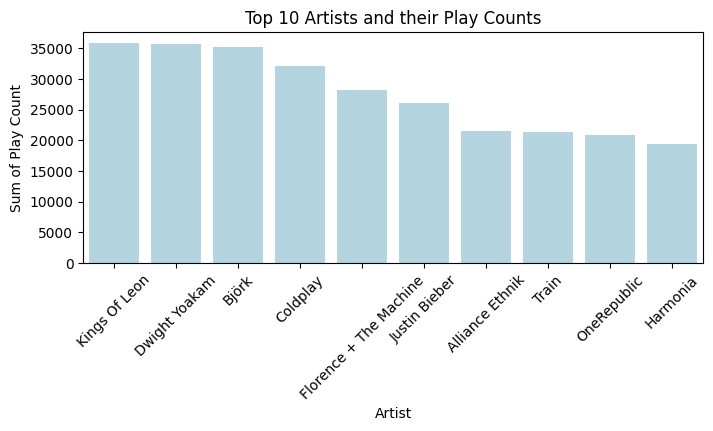

In [ ]:
plt.figure(figsize=(8, 3))
sns.barplot(data=top_10_artists,
              x='artist_name',
              y='play_count',
               estimator=np.mean  ,
            color='lightblue',
            errorbar=None
            )
plt.title('Top 10 Artists and their Play Counts')
plt.xlabel('Artist')
plt.xticks(rotation=45)
plt.ylabel('Sum of Play Count')
plt.show()

## Top 10 Songs by Play Count

In [ ]:
top_10_songs = merged_df.groupby('song')[['play_count']].agg('sum').reset_index().nlargest(10,'play_count')
top_10_songs

,song,play_count
136071,You're The One,35738
125398,Undo,33179
93989,Revelry,24359
98817,Sehr kosmisch,19454
49062,Horn Concerto No. 4 in E flat K495: II. Romanc...,17115
28717,Dog Days Are Over (Radio Edit),14279
98590,Secrets,12492
3865,Ain't Misbehavin,11610
56919,Invalid,10794
18574,Catch You Baby (Steve Pitron & Max Sanna Radio...,10515


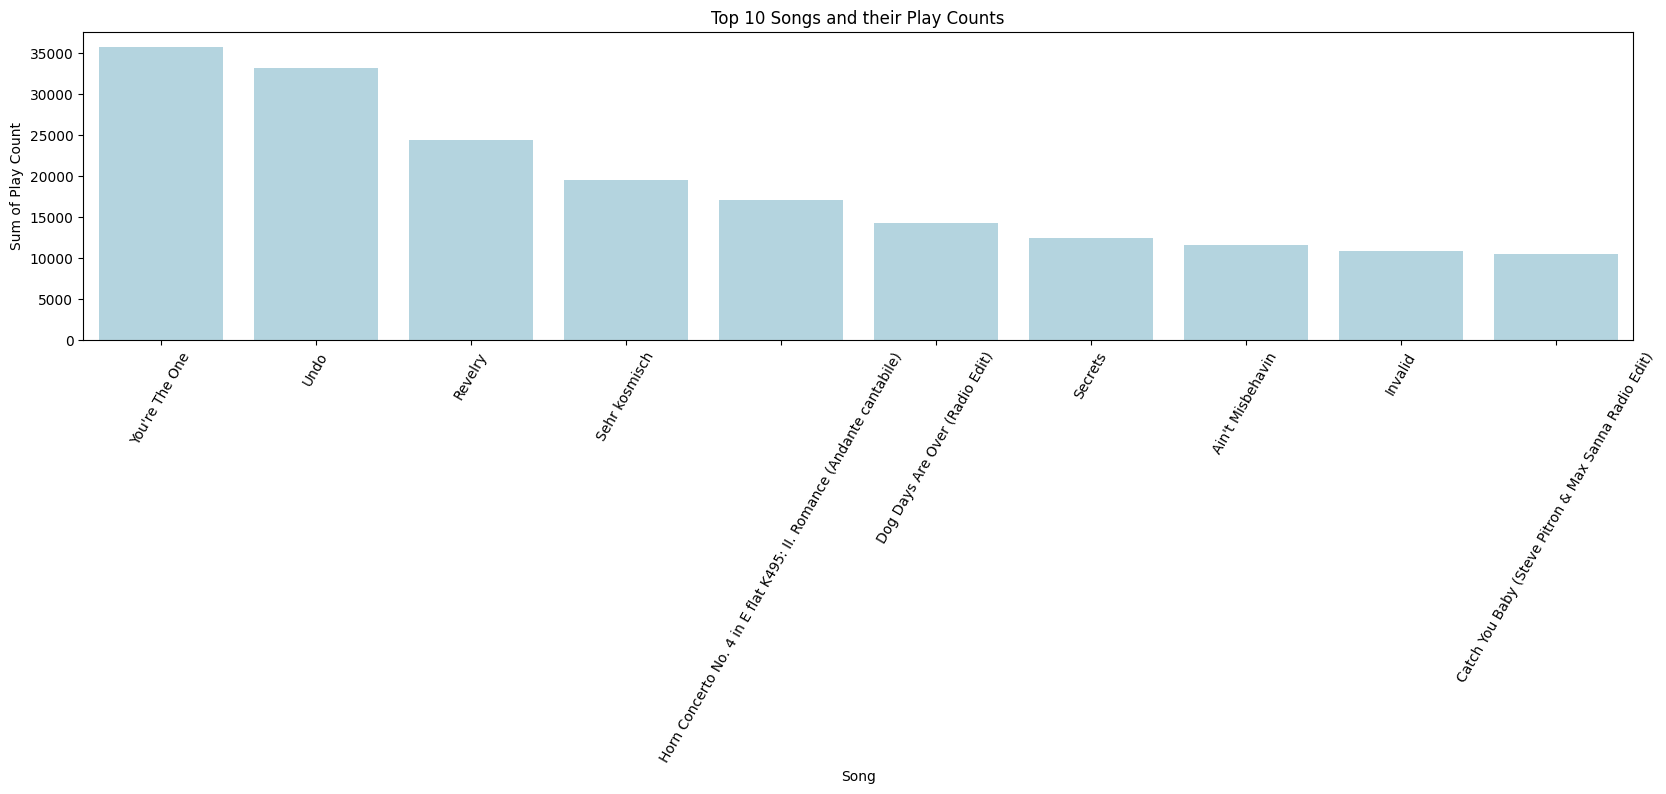

In [ ]:
plt.figure(figsize=(20, 4))
sns.barplot(data=top_10_songs,
              x='song',
              y='play_count',
               estimator=np.mean  ,
            color='lightblue',
            errorbar=None
            )
plt.title('Top 10 Songs and their Play Counts')
plt.xlabel('Song')
plt.xticks(rotation=60)
plt.ylabel('Sum of Play Count')
plt.show()

Here is some code if you wanna see the popular songs but with their artist attached as well.

In [ ]:
popular = merged_df[['artist_name','song','play_count']]

artist_pop = popular.pivot_table(values=['play_count'],index = ['artist_name','song'] ,aggfunc = 'sum')

artist_pop = artist_pop.sort_values(by='play_count',ascending=False)

artist_pop = artist_pop.reset_index()

artist_pop.head(10)

,artist_name,song,play_count
0,Dwight Yoakam,You're The One,35432
1,Björk,Undo,33179
2,Kings Of Leon,Revelry,24359
3,Harmonia,Sehr kosmisch,19454
4,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,17115
5,Florence + The Machine,Dog Days Are Over (Radio Edit),14279
6,OneRepublic,Secrets,12392
7,Sam Cooke,Ain't Misbehavin,11610
8,Tub Ring,Invalid,10794
9,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,10515


## Top 10 Users by Number of Songs Rated

In [ ]:
top_10_users = merged_df.groupby('user_id')[['song']].count().reset_index().nlargest(10,'song')
top_10_users

,user_id,song
53921,7d90be8dfdbde170f036ce8a4b915440137cb11c,53
643,016a24e91a72c159a5048ab1b9b2ba5ce761b526,52
1597,03ad93fdb01506ce205f4708decf8e4b1ae90fff,52
6694,0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90,52
19962,2e424b28bff1f62a2dae22a918f09f9c30c06d1b,52
90680,d30e18323f15426c3cdc8585252ed34459916f51,52
21323,316110734d8da7478cc33237458814f770a9eb7a,51
54171,7e27789eae69bc946c51833c0b833a49c58ed9ed,51
64941,9769ebffc543fa42b58daf6f52f8816abf5f408e,51
65684,992fea335363e87217e1b052fd7380b3fd7e35b4,51


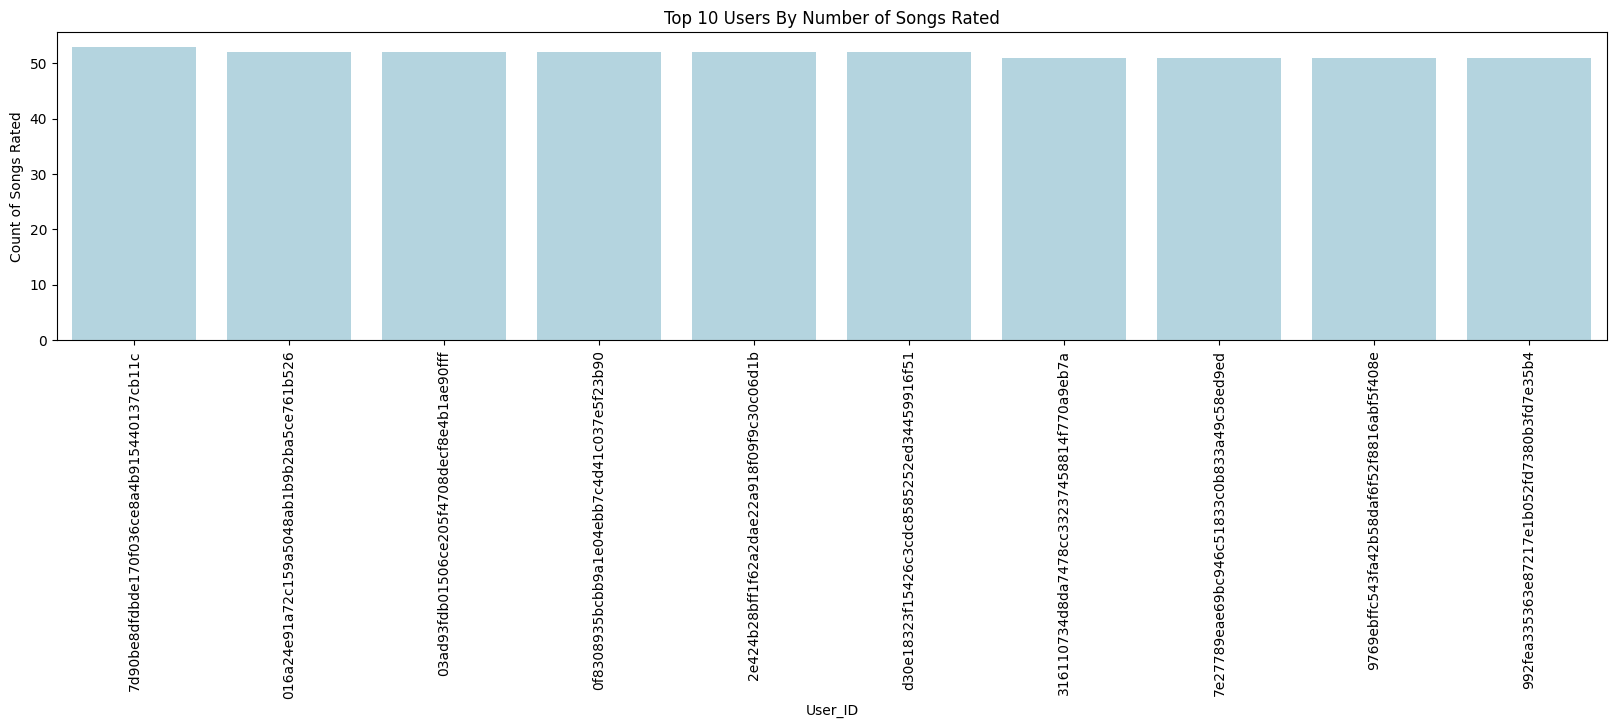

In [ ]:
plt.figure(figsize=(20, 4))
sns.barplot(data=top_10_users,
              x='user_id',
              y='song',
               estimator=np.mean  ,
            color='lightblue',
            errorbar=None
            )
plt.title('Top 10 Users By Number of Songs Rated')
plt.xlabel('User_ID')
plt.xticks(rotation=90)
plt.ylabel('Count of Songs Rated')
plt.show()

# Baseline Performance

## Surprise Data Prep

In [ ]:
# -- initalize the data reader --
reader = Reader(rating_scale=(1, 10))
# -- load the data from pandas --
data = Dataset.load_from_df(merged_df[['user_id',
                                  'song_id',
                                  'play_count']],
                            reader)
# Split the dataset into training and test set
trainset, testset = train_test_split(data, test_size=0.2)
trainset

In [ ]:
print(f"user count. : {trainset.n_users}")
print(f"item count. : {trainset.n_items}")
print(f"rating count: {trainset.n_ratings}")
print(f"rating range: {trainset.rating_scale}")

user count. : 109997
item count. : 149054
rating count: 1160761
rating range: (1, 10)


In [ ]:
# Define and train the BaselineOnly model
print("Evaluating Global Mean Baseline:")
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 5,
               'reg_i': 5}  # You can adjust these parameters
algo_global = BaselineOnly(bsl_options=bsl_options)
algo_global.fit(trainset)
# Predict ratings for the testset
predictions_global = algo_global.test(testset)
# Compute and print RMSE
rmse_global = accuracy.rmse(predictions_global)
# Compute and print MAE
mae_global = accuracy.mae(predictions_global)


Evaluating Global Mean Baseline:
Estimating biases using als...
RMSE: 6.6837
MAE:  2.5249


In [ ]:
# Define and evaluate the user mean baseline
print("Evaluating User Mean Baseline:\n")
bsl_options = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 5,     # Regular user regularization
    'reg_i': 100    # High item regularization to diminish item bias
}

#algo_user = BaselineOnly(bsl_options=bsl_options)
algo_user = BaselineOnly(bsl_options=bsl_options)
algo_user.fit(trainset)
# Predict ratings for the testset
predictions = algo_user.test(testset)
# Compute and print RMSE
rmse = accuracy.rmse(predictions)
# Compute and print MAE
mae = accuracy.mae(predictions)

Evaluating User Mean Baseline:

Estimating biases using als...
RMSE: 6.6681
MAE:  2.4998


In [ ]:
# Define and evaluate the ITEM mean baseline
print("\nEvaluating Item Mean Baseline:\n")

bsl_options = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 100,  # High user regularization to diminish user bias
    'reg_i': 5     # Regular item regularization
}
algo_item = BaselineOnly(bsl_options=bsl_options)
algo_item.fit(trainset)
# Predict ratings for the testset
predictions = algo_item.test(testset)
# Compute and print RMSE
rmse = accuracy.rmse(predictions)
# Compute and print MAE
mae = accuracy.mae(predictions)


Evaluating Item Mean Baseline:

Estimating biases using als...
RMSE: 6.8858
MAE:  2.7806


## Comparing Baseline & SVD Results

In [ ]:
print("Evaluating SVD vs. Baseline:\n")
print(f"RMSE: {rmse:.4f} VS. baseline: {rmse_global:.4f}")
print(f"MAE: {mae:.4f} VS. baseline: {mae_global:.4f}")

Evaluating SVD vs. Baseline:

RMSE: 6.8858 VS. baseline: 6.6837
MAE: 2.7806 VS. baseline: 2.5249


# SVD Modeling

Now it's time for the actual SVD. This will take like a minute to find the RMSE.

In [ ]:
reader = Reader(rating_scale=(merged_df['play_count_binned'].min(),
                              merged_df['play_count_binned'].max()))
data = Dataset.load_from_df(merged_df[['user_id','song_id','play_count_binned']], reader)


# test set is made of 30% of the ratings.
trainset, testset = train_test_split(data,test_size=0.3)

# We'll use the famous SVD algorithm.
algo = SVD(n_epochs=50, n_factors=200)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 2.3362


2.336226779105902

## Function for Untuned Recommendations

In [ ]:
def get_top_n_recommendations(user_id, data, model, n=10):
    # 1. Identify all unique songs in the dataset
    all_songs = data.df['song_id'].unique()

    # 2. Filter out songs that the user has already reviewed
    reviewed_songs = data.df[data.df['user_id'] == user_id]['song_id'].unique()
    songs_to_predict = np.setdiff1d(all_songs, reviewed_songs)

    # 3. Use the model to predict the ratings for these songs
    predictions = [model.predict(user_id, song).est for song in songs_to_predict]

    # 4. Combine songs and predictions into a list of tuples and sort them
    song_predictions = list(zip(songs_to_predict, predictions))
    song_predictions.sort(key=lambda x: x[1], reverse=True)

    # Return the top n songs
    return song_predictions[:n]

## Recommendations for Eric Untuned SVD

In [ ]:
user_id = 'ERIC M'  # replace with the user ID
top_songs = get_top_n_recommendations(user_id, data, algo, n=10)
print(f"Top 10 Song Recommendations for : {user_id}")

for song_name, predicted_rating in top_songs:
    print(f"{song_name}: {predicted_rating:.4f}")

Top 10 Song Recommendations for : ERIC M
SOJSXJY12A8C13E32E: 9.7716
SOBSGZI12A8C13F8DF: 9.6635
SOTGNIO12AB0184317: 9.4922
SOBAPGM12AB0183DC5: 9.4718
SOTOECK12AAA8C6BB7: 9.1136
SOEHAAP12A6D4F732E: 9.0659
SOBAXAL12A6D4FA473: 8.9430
SOMTZYU12AB017D632: 8.8362
SOMHKRF12AC3DF60C1: 8.7935
SOVXXJJ12AC4686528: 8.7860


In [ ]:
pred = pd.DataFrame(top_songs, columns=["song_id", "play_count"])
merged_pred = pd.merge(pred, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_pred

,song_id,play_count,track_id,artist_name,song
0,SOJSXJY12A8C13E32E,9.771587,TRHRTYE128F427EA7D,Clara Hill,Clara meets Slope - Hard To Say
1,SOBSGZI12A8C13F8DF,9.663451,TRSFMKQ128F92DF46C,Thursday,Signals Over The Air
2,SOTGNIO12AB0184317,9.492195,TRCCXZQ128F930DE80,Delegation,One More Step To Take
3,SOBAPGM12AB0183DC5,9.471760,TRFCUVS12903CB339B,Timo Maas,Jetstream
4,SOTOECK12AAA8C6BB7,9.113560,TRQSZDX128F92F45D2,Renegade Soundwave,Pocket Porn (1990)
5,SOEHAAP12A6D4F732E,9.065921,TRSIIMS128F146C9F9,The Frank And Walters,Have You Ever
6,SOBAXAL12A6D4FA473,8.942955,TRJOTOI128F14AAEC4,Royal Philharmonic Orchestra/Sir Thomas Beecham,The Nutcracker - Suite Op. 71a (2007 Digital R...
7,SOMTZYU12AB017D632,8.836231,TROTSZG128F93123E5,Joyce Cooling,It's Time I Go (Jazz)
8,SOMHKRF12AC3DF60C1,8.793492,TRODHVG12903D036A4,Delirious,Dance Flow
9,SOVXXJJ12AC4686528,8.786001,TRUJGLZ12903CF7C08,David Byrne & Fatboy Slim feat. Roisin Murphy ...,Don't You Agree? (Album Version)


## Recommendations for Anthony Untuned SVD

In [ ]:
user_id = 'Anthony Ayala'  # replace with the user ID
top_songs = get_top_n_recommendations(user_id, data, algo, n=10)
print(f"Top 10 Song Recommendations for : {user_id}")

for song_name, predicted_rating in top_songs:
    print(f"{song_name}: {predicted_rating:.4f}")

Top 10 Song Recommendations for : Anthony Ayala
SOYRTVQ12AB018BD14: 10.0000
SOZEBAZ12AF72A80C8: 9.9841
SOWYRXW12A8C1351CA: 9.8908
SOEMTKR12A6D4F8922: 9.8837
SOSDVSH12A81356D41: 9.8594
SODXKHS12A8C13EBB6: 9.8395
SOZCBWK12A58A7DFA5: 9.7394
SORHUJT12A8C13B85E: 9.6627
SONPZCD12A58A7B2E7: 9.6620
SODWFXL12A6D4FB509: 9.6568


In [ ]:
pred = pd.DataFrame(top_songs, columns=["song_id", "play_count"])
merged_pred = pd.merge(pred, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_pred

,song_id,play_count,track_id,artist_name,song
0,SOYRTVQ12AB018BD14,10.000000,TRCYLFR12903CE58F0,Olivier Darock,Miss You
1,SOZEBAZ12AF72A80C8,9.984144,TRMDUPQ128F428729B,Thursday,Voices On A String (Album Version)
2,SOWYRXW12A8C1351CA,9.890801,TRMLIKM128F425F622,Joe Christmas,Bedroom Suite
3,SOEMTKR12A6D4F8922,9.883717,TRQKHEY128F147B04D,Soraya,A Tu Lado
4,SOSDVSH12A81356D41,9.859391,TREUVXG12903CA6D2C,Pavement,Heaven Is A Truck
5,SODXKHS12A8C13EBB6,9.839482,TRIYCEC128F427D41F,Donna Lewis,Mother ( LP Version )
6,SOZCBWK12A58A7DFA5,9.739352,TRJXYKD128F4287C73,Slum Village,Let's Go (Produced by B.R. Gunna)
7,SORHUJT12A8C13B85E,9.662733,TRBJFDB128F428DF1E,Looptroop,Long Arm Of The Law
8,SONPZCD12A58A7B2E7,9.661996,TRFTKEY12903CE8211,Damnation A.d.,Two Steps Down
9,SODWFXL12A6D4FB509,9.656767,TRVJKLX128F422BC5A,Groove Armada,Song 4 Mutya (Out Of Control)


# Hyperparameter Tuning

## Finding the Best Parameters

In [ ]:
from surprise.model_selection import GridSearchCV

param_grid = {
    'n_factors': [50, 75, 100],
    'n_epochs': [10, 20, 30],
    'lr_all': [0.005, 0.01],
    'reg_all': [0.02, 0.05]
}

gs = GridSearchCV(SVD, param_grid, measures=['RMSE', 'MAE'], cv=3)
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


2.318347041780583
{'n_factors': 50, 'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.05}


The best parameters are **{'n_factors': 50, 'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.05}**

I hope whoever is reading this appreciates the time I took to run the code. It took almost 48 minutes to find the best parameters for the entire dataset.

In [ ]:
reader = Reader(rating_scale=(merged_df['play_count_binned'].min(),
                              merged_df['play_count_binned'].max()))
data = Dataset.load_from_df(merged_df[['user_id','song_id','play_count_binned']], reader)


# test set is made of 30% of the ratings.
trainset, testset = train_test_split(data,test_size=0.3)

# We'll use the famous SVD algorithm.
algo = SVD(n_epochs=10, n_factors=50, lr_all=0.01, reg_all=0.05)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 2.3144


2.31440050541134

## Function for Tuned Recommendations

In [ ]:
def get_top_n_recommendations_tuned(user_id, data, model, n=10):
    # 1. Identify all unique songs in the dataset
    all_songs = data.df['song_id'].unique()

    # 2. Filter out songs that the user has already reviewed
    reviewed_songs = data.df[data.df['user_id'] == user_id]['song_id'].unique()
    songs_to_predict = np.setdiff1d(all_songs, reviewed_songs)

    # 3. Use the model to predict the ratings for these songs
    predictions = [model.predict(user_id, song).est for song in songs_to_predict]

    # 4. Combine songs and predictions into a list of tuples and sort them
    song_predictions = list(zip(songs_to_predict, predictions))
    song_predictions.sort(key=lambda x: x[1], reverse=True)

    # Return the top n songs
    return song_predictions[:n]

## Recommendations for Eric w/ Tuned Parameters

In [ ]:
user_id = 'ERIC M'  # replace with the user ID
top_songs = get_top_n_recommendations_tuned(user_id, data, algo, n=10)
print(f"Top 10 Song Recommendations for : {user_id}")

for song_name, predicted_rating in top_songs:
    print(f"{song_name}: {predicted_rating:.4f}")

Top 10 Song Recommendations for : ERIC M
SOJSXJY12A8C13E32E: 9.9811
SONDKOF12A6D4F7D70: 9.4352
SOIOZHO12AB017FE5E: 9.3016
SOKYHYL12A8C13D79D: 9.1692
SOQBUFQ12A6D4F7F4C: 8.8454
SOJGUSJ12A8C1363A2: 8.7028
SOVMADB12A8C137B96: 8.6250
SOAZZRU12AB0182B0E: 8.5950
SOYRTVQ12AB018BD14: 8.4736
SONJXPP12A8AE48D26: 8.4570


In [ ]:
pred = pd.DataFrame(top_songs, columns=["song_id", "play_count"])
merged_pred = pd.merge(pred, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_pred

,song_id,play_count,track_id,artist_name,song
0,SOJSXJY12A8C13E32E,9.981057,TRHRTYE128F427EA7D,Clara Hill,Clara meets Slope - Hard To Say
1,SONDKOF12A6D4F7D70,9.435229,TRVSHJE128F1475018,Alceu Valença,Recado Falado (Metrô Da Saudade)
2,SOIOZHO12AB017FE5E,9.301643,TRFDJKM128F92EE287,Philippe Rochard,Crumpshit
3,SOKYHYL12A8C13D79D,9.169204,TRAOIAH128F92F707B,Ice Cube,It Was A Good Day
4,SOQBUFQ12A6D4F7F4C,8.845409,TRUBGXP128F1462C9D,Sev Statik,MIC (Speak Life Album Version)
5,SOJGUSJ12A8C1363A2,8.702784,TROSFKO128F424D935,Times New Viking,Imagine Dead John Lennon
6,SOVMADB12A8C137B96,8.625022,TRTRVEP128F428F617,Pearl Jam,Encore Break
7,SOAZZRU12AB0182B0E,8.594968,TRDQNFI128F93133B4,Angels Of Light & Akron/Family,Oceanside
8,SOYRTVQ12AB018BD14,8.473552,TRCYLFR12903CE58F0,Olivier Darock,Miss You
9,SONJXPP12A8AE48D26,8.457045,TRPLYAH128F426B9CD,Paulina Rubio,Un Dia Gris


## Recommendations for Anthony w/ Tuned Parameters

In [ ]:
user_id = 'Anthony Ayala'  # replace with the user ID
top_songs = get_top_n_recommendations_tuned(user_id, data, algo, n=10)
print(f"Top 10 Song Recommendations for : {user_id}")

for song_name, predicted_rating in top_songs:
    print(f"{song_name}: {predicted_rating:.4f}")

Top 10 Song Recommendations for : Anthony Ayala
SOJSXJY12A8C13E32E: 10.0000
SOTVLHC12A6701EA31: 10.0000
SOZEBAZ12AF72A80C8: 10.0000
SOGSDHY12AB017BF39: 9.9309
SOWHSGK12A6D4FC429: 9.7421
SOVSPCM12A67ADE7A8: 9.7160
SOJYISZ12A8C135F5A: 9.6705
SOMVIOV12A6D4F719A: 9.6181
SOHTKMO12AB01843B0: 9.4404
SOUIKSL12A6701D19A: 9.3493


In [ ]:
pred = pd.DataFrame(top_songs, columns=["song_id", "play_count"])
merged_pred = pd.merge(pred, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_pred

,song_id,play_count,track_id,artist_name,song
0,SOJSXJY12A8C13E32E,10.000000,TRHRTYE128F427EA7D,Clara Hill,Clara meets Slope - Hard To Say
1,SOTVLHC12A6701EA31,10.000000,TRDUQXB128E078B02F,Disturbed,Numb (Album Version)
2,SOZEBAZ12AF72A80C8,10.000000,TRMDUPQ128F428729B,Thursday,Voices On A String (Album Version)
3,SOGSDHY12AB017BF39,9.930915,TRIGFBJ128F92E2161,Homesick James,Working With Homesick
4,SOWHSGK12A6D4FC429,9.742054,TRXFDKV128F4231160,Bootsy Collins,Stretchin' Out (In A Rubber Band) (LP Version)
5,SOVSPCM12A67ADE7A8,9.716035,TRRGHAH12903CF1F0F,Krisiun,In League With Satan
6,SOJYISZ12A8C135F5A,9.670498,TRXFRRY128F42997E1,Shaggy / Samantha Cole,Luv Me_ Luv Me
7,SOMVIOV12A6D4F719A,9.618123,TRCRUFT128F14629ED,ARRESTED DEVELOPMENT,Tennessee (Pirate Radio Mix)
8,SOHTKMO12AB01843B0,9.440442,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
9,SOUIKSL12A6701D19A,9.349279,TRRRWDM128E0791464,Rise Against,Nervous Breakdown


# Random Sample of Users

I thought it would be fun to pick out a random sample of five people who have ten or more song plays and make recommendations with the tuned SVD, but the caveat is only recommending songs they haven't listened to yet.

The first step is to group each user id with their respective play counts.

In [ ]:
users_and_their_plays= merged_df.groupby('user_id')['play_count'].sum()
users_and_their_plays

user_id
00007a02388c208ea7176479f6ae06f8224355b3     13
00014a76ed063e1a749171a253bca9d9a0ff1782     24
00015189668691680bb1a2e58afde1541ec92ced    101
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2     12
00020fcd8b01986a6a85b896ccde6c49f35142ad     44
                                           ... 
fffdef71f13352e9cff769f1d96f5ccf90f8955e     10
fffe29116f96c97b47a5dabdd406784ad0ba6f30     10
fffe5b73c50c72ca9c54947efac1fcacf59c4a17    108
fffed0bee753cd78494011b8b55dafd4f5c7e5ff     76
ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee     42
Name: play_count, Length: 110002, dtype: int64

In [ ]:
print(users_and_their_plays)

user_id
00007a02388c208ea7176479f6ae06f8224355b3     13
00014a76ed063e1a749171a253bca9d9a0ff1782     24
00015189668691680bb1a2e58afde1541ec92ced    101
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2     12
00020fcd8b01986a6a85b896ccde6c49f35142ad     44
                                           ... 
fffdef71f13352e9cff769f1d96f5ccf90f8955e     10
fffe29116f96c97b47a5dabdd406784ad0ba6f30     10
fffe5b73c50c72ca9c54947efac1fcacf59c4a17    108
fffed0bee753cd78494011b8b55dafd4f5c7e5ff     76
ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee     42
Name: play_count, Length: 110002, dtype: int64


Next, I want to throw in the condition that they have ten or more play counts but I am using set to make sure the user ids are unique because .unique() was not working here.

In [ ]:
users_with_ten_plus_plays = set((users_and_their_plays[users_and_their_plays >= 10]).index)
users_with_ten_plus_plays

{'83cbd1a37f1d0c7fb39d334369746fee972f3f1c',
 '8c449d472b14d710a729eb746af32774f33e5961',
 '1e78f399baea65241ace6178ce31cd4ace7fa86f',
 'e4ddfb9272c5334205ed59918fd9f5a280fc2807',
 '034ad0033d630d3603fff0b1c22de1e1bc6f5328',
 '08356e199defcfb519bdb2ab7ac61c562d198d12',
 '805ae3df8020391e4c2b0d3dd61e088830b90814',
 '56dd824f37c8a23226e312180fc819bcf5780f17',
 '73d9f3e24f84b132781a80993d1e67c58b20b1dd',
 'fd706df6ac6c43d7c697fdc6776a6c95fb7f91c0',
 '1ac0c89c665c236808207e916f1c46dbf3572e93',
 '5b9e5a6d0f906162c8c8f7e403e212533ddd388e',
 '9f4316623c2728a9017bb5f0abd3d19146769d46',
 'e106d9bd481e1f5ba2a9bda124c7763653f950ce',
 '0b98f1bdf847a230e1f8decbad82429cd2f8bf27',
 'b9fd243862dcf79e8fa6d1f771a6c62f5598d306',
 '61749dfdbecc31ffda603740187ce924e6a73273',
 '8b2645048db595595be6df8b5dcfc99d420e9930',
 '43be2c037cd580e7bc64115b8b3fd4a12e40d6b5',
 '84b75c0dc9f6728f71d2f76d0f38f7bbbbfce609',
 '25319b2ce5a97ff32f3d4bff1a7291bafd1ae8e9',
 'c411084a15f05bdacaf538f26c46880c8350ad91',
 '8726d807

Now I want to filter for only the user IDs in users_with_ten_plus_plays.

In [ ]:
filtered_users = users_and_their_plays[users_and_their_plays.index.isin(users_with_ten_plus_plays)]
filtered_users

user_id
00007a02388c208ea7176479f6ae06f8224355b3     13
00014a76ed063e1a749171a253bca9d9a0ff1782     24
00015189668691680bb1a2e58afde1541ec92ced    101
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2     12
00020fcd8b01986a6a85b896ccde6c49f35142ad     44
                                           ... 
fffdef71f13352e9cff769f1d96f5ccf90f8955e     10
fffe29116f96c97b47a5dabdd406784ad0ba6f30     10
fffe5b73c50c72ca9c54947efac1fcacf59c4a17    108
fffed0bee753cd78494011b8b55dafd4f5c7e5ff     76
ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee     42
Name: play_count, Length: 93467, dtype: int64

## My Five Random Users

Now it is time to randomly sample five users and then generate some recommendations for them.

In [ ]:
random_users = random.sample(users_with_ten_plus_plays, 5)
random_users

['ccdcdab35c822043190bd99e73e3afedbe8b5977',
 '29a6be8f31be2d6eeb0e04498bd84eca2b91d274',
 '5573efcca0b6e59912ce313131b951740c1be014',
 '7d69cf8e7cad3cd9034c3bb39ccf68a5a59c7c9f',
 '8009f3d79c82f719ecb2084062539acdecaf9915']

## Function for Random Users

In [ ]:
def get_top_n_recommendations_random(user_id, data, model, n=10):
    # 1. Identify all unique songs in the dataset
    all_songs = data.df['song_id'].unique()

    # 2. Filter out songs that the user has already reviewed
    reviewed_songs = data.df[data.df['user_id'] == user_id]['song_id'].unique()
    songs_to_predict = np.setdiff1d(all_songs, reviewed_songs)

    # 3. Use the model to predict the ratings for these songs
    predictions = [model.predict(user_id, song).est for song in songs_to_predict]

    # 4. Combine songs and predictions into a list of tuples and sort them
    song_predictions = list(zip(songs_to_predict, predictions))
    song_predictions.sort(key=lambda x: x[1], reverse=True)

    # Return the top n songs
    return song_predictions[:n]

## Recommendations for Random User 1

In [ ]:
user_id = 'ccdcdab35c822043190bd99e73e3afedbe8b5977'  # replace with the user ID
top_songs = get_top_n_recommendations_random(user_id, data, algo, n=10)
print(f"Top 10 Song Recommendations for : {user_id}")

for song_name, predicted_rating in top_songs:
    print(f"{song_name}: {predicted_rating:.4f}")

Top 10 Song Recommendations for : ccdcdab35c822043190bd99e73e3afedbe8b5977
SOJSXJY12A8C13E32E: 6.1593
SOHWXEU12A8C1320D1: 5.4576
SOTGNIO12AB0184317: 5.4238
SOIOZHO12AB017FE5E: 5.3568
SOXXSVC12A582A242D: 5.2776
SOJZSWQ12A8C13BD47: 5.2678
SOUSJFU12AB018460D: 5.2508
SOSJSSU12A6D4F8F41: 5.2461
SODZEOH12A6D4F52FB: 5.1973
SOQBUFQ12A6D4F7F4C: 5.1674


In [ ]:
pred = pd.DataFrame(top_songs, columns=["song_id", "play_count"])
merged_pred = pd.merge(pred, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_pred

,song_id,play_count,track_id,artist_name,song
0,SOJSXJY12A8C13E32E,6.159313,TRHRTYE128F427EA7D,Clara Hill,Clara meets Slope - Hard To Say
1,SOHWXEU12A8C1320D1,5.457569,TRNSRJG128F42627A1,Diam's,Dans Ma Bulle (Edit Radio - Live 2006)
2,SOTGNIO12AB0184317,5.423756,TRCCXZQ128F930DE80,Delegation,One More Step To Take
3,SOIOZHO12AB017FE5E,5.356785,TRFDJKM128F92EE287,Philippe Rochard,Crumpshit
4,SOXXSVC12A582A242D,5.277596,TRTAVWJ128E078DA2A,Jake Hess,Death Ain't No Big Deal (Tribute To Jake Hess ...
5,SOJZSWQ12A8C13BD47,5.267832,TRIQRMM128F427227A,León Gieco,Canción Para Luchar
6,SOUSJFU12AB018460D,5.250762,TRQTJUP128F9335CA2,Franz Ferdinand,Call Me
7,SOSJSSU12A6D4F8F41,5.246081,TRYOXHI128F147B730,Old 97's,Victoria (LP Version)
8,SODZEOH12A6D4F52FB,5.197342,TRYVOCJ128F1473623,Freddie & The Dreamers,All I Ever Want Is You
9,SOQBUFQ12A6D4F7F4C,5.167360,TRUBGXP128F1462C9D,Sev Statik,MIC (Speak Life Album Version)


## Recommendations for Random User 2

In [ ]:
user_id = '29a6be8f31be2d6eeb0e04498bd84eca2b91d274'  # replace with the user ID
top_songs = get_top_n_recommendations_random(user_id, data, algo, n=10)
print(f"Top 10 Song Recommendations for : {user_id}")

for song_name, predicted_rating in top_songs:
    print(f"{song_name}: {predicted_rating:.4f}")

Top 10 Song Recommendations for : 29a6be8f31be2d6eeb0e04498bd84eca2b91d274
SOVMADB12A8C137B96: 6.3411
SOMBGAL12AB0181F7F: 6.0960
SOXXSVC12A582A242D: 5.8744
SOHHZKM12A6D4F70DA: 5.8259
SOIDMQZ12A58A7D6BF: 5.8086
SOXEIUT12AC468D7B3: 5.7981
SONDKOF12A6D4F7D70: 5.7812
SOJSXJY12A8C13E32E: 5.7504
SOSAZWK12AC468D8C2: 5.6859
SORTFPF12A81C2171A: 5.6741


In [ ]:
pred = pd.DataFrame(top_songs, columns=["song_id", "play_count"])
merged_pred = pd.merge(pred, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_pred

,song_id,play_count,track_id,artist_name,song
0,SOVMADB12A8C137B96,6.341073,TRTRVEP128F428F617,Pearl Jam,Encore Break
1,SOMBGAL12AB0181F7F,6.095955,TRSNWWE128F9315578,The Gerbils,(iii)
2,SOXXSVC12A582A242D,5.874373,TRTAVWJ128E078DA2A,Jake Hess,Death Ain't No Big Deal (Tribute To Jake Hess ...
3,SOHHZKM12A6D4F70DA,5.825891,TRHMECP128F1475A10,C.V. Jørgensen,Pak Dit Grej (1998 Digital Remaster)
4,SOIDMQZ12A58A7D6BF,5.808626,TRPKSFQ128F92C6641,Gym Class Heroes,Kissin' Ears [feat. The-Dream] (Explicit Album...
5,SOXEIUT12AC468D7B3,5.798092,TRQGNHY12903CEB9D9,Butthole Surfers,Hey
6,SONDKOF12A6D4F7D70,5.781174,TRVSHJE128F1475018,Alceu Valença,Recado Falado (Metrô Da Saudade)
7,SOJSXJY12A8C13E32E,5.750448,TRHRTYE128F427EA7D,Clara Hill,Clara meets Slope - Hard To Say
8,SOSAZWK12AC468D8C2,5.685866,TRWFQWD12903CEC6AE,Christopher O'Riley,paranoid android
9,SORTFPF12A81C2171A,5.674093,TRAKUYZ128F422BC4B,Elisa,Almeno Tu Nell'Universo


## Recommendations for Random User 3

In [ ]:
user_id = '5573efcca0b6e59912ce313131b951740c1be014'  # replace with the user ID
top_songs = get_top_n_recommendations_random(user_id, data, algo, n=10)
print(f"Top 10 Song Recommendations for : {user_id}")

for song_name, predicted_rating in top_songs:
    print(f"{song_name}: {predicted_rating:.4f}")

Top 10 Song Recommendations for : 5573efcca0b6e59912ce313131b951740c1be014
SOJSXJY12A8C13E32E: 5.8089
SOTGNIO12AB0184317: 5.2406
SOMVIOV12A6D4F719A: 5.0350
SONGFDK12A6310D899: 5.0060
SOIDMQZ12A58A7D6BF: 4.9959
SOSAZWK12AC468D8C2: 4.9852
SOGSDHY12AB017BF39: 4.8866
SOLQKSP12A8C1358B0: 4.8305
SOACBLB12AB01871C7: 4.8007
SONZLJF12A6D4FAEAD: 4.8005


In [ ]:
pred = pd.DataFrame(top_songs, columns=["song_id", "play_count"])
merged_pred = pd.merge(pred, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_pred

,song_id,play_count,track_id,artist_name,song
0,SOJSXJY12A8C13E32E,5.808878,TRHRTYE128F427EA7D,Clara Hill,Clara meets Slope - Hard To Say
1,SOTGNIO12AB0184317,5.240617,TRCCXZQ128F930DE80,Delegation,One More Step To Take
2,SOMVIOV12A6D4F719A,5.035031,TRCRUFT128F14629ED,ARRESTED DEVELOPMENT,Tennessee (Pirate Radio Mix)
3,SONGFDK12A6310D899,5.006017,TRCLUPU128E07820C0,Richard Ashcroft,A Song For The Lovers
4,SOIDMQZ12A58A7D6BF,4.995869,TRPKSFQ128F92C6641,Gym Class Heroes,Kissin' Ears [feat. The-Dream] (Explicit Album...
5,SOSAZWK12AC468D8C2,4.985210,TRWFQWD12903CEC6AE,Christopher O'Riley,paranoid android
6,SOGSDHY12AB017BF39,4.886633,TRIGFBJ128F92E2161,Homesick James,Working With Homesick
7,SOLQKSP12A8C1358B0,4.830494,TREZBSY128F42726B5,Train,My Private Nation
8,SOACBLB12AB01871C7,4.800668,TRXBOYH12903CAE41F,keller williams,221
9,SONZLJF12A6D4FAEAD,4.800548,TRPNQFO128F14A792E,Gazpacho,Premonicion


## Recommendations for Random User 4

In [ ]:
user_id = '7d69cf8e7cad3cd9034c3bb39ccf68a5a59c7c9f'  # replace with the user ID
top_songs = get_top_n_recommendations_random(user_id, data, algo, n=10)
print(f"Top 10 Song Recommendations for : {user_id}")

for song_name, predicted_rating in top_songs:
    print(f"{song_name}: {predicted_rating:.4f}")

Top 10 Song Recommendations for : 7d69cf8e7cad3cd9034c3bb39ccf68a5a59c7c9f
SOJSXJY12A8C13E32E: 9.1832
SONDKOF12A6D4F7D70: 8.7908
SOGSDHY12AB017BF39: 8.1337
SONXUQR12AB0186C9F: 7.2079
SOYIIBR12A58A7BADD: 7.1421
SOMVIOV12A6D4F719A: 6.8012
SOTVLHC12A6701EA31: 6.7631
SOLVHIW12A8C13BA03: 6.7019
SOLQKSP12A8C1358B0: 6.7019
SOTVZIB12A6D4F694A: 6.6417


In [ ]:
pred = pd.DataFrame(top_songs, columns=["song_id", "play_count"])
merged_pred = pd.merge(pred, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_pred

,song_id,play_count,track_id,artist_name,song
0,SOJSXJY12A8C13E32E,9.183154,TRHRTYE128F427EA7D,Clara Hill,Clara meets Slope - Hard To Say
1,SONDKOF12A6D4F7D70,8.790789,TRVSHJE128F1475018,Alceu Valença,Recado Falado (Metrô Da Saudade)
2,SOGSDHY12AB017BF39,8.133743,TRIGFBJ128F92E2161,Homesick James,Working With Homesick
3,SONXUQR12AB0186C9F,7.207906,TRHGBSJ12903CC64A7,Seine,So far so long
4,SOYIIBR12A58A7BADD,7.142056,TRTESQR128E078DF6B,Nine Inch Nails,Where Is Everybody?
5,SOMVIOV12A6D4F719A,6.801231,TRCRUFT128F14629ED,ARRESTED DEVELOPMENT,Tennessee (Pirate Radio Mix)
6,SOTVLHC12A6701EA31,6.763145,TRDUQXB128E078B02F,Disturbed,Numb (Album Version)
7,SOLVHIW12A8C13BA03,6.701943,TROPMOC128F427AF98,Caribou (formerly Dan Snaith's Manitoba),Webers
8,SOLQKSP12A8C1358B0,6.701910,TREZBSY128F42726B5,Train,My Private Nation
9,SOTVZIB12A6D4F694A,6.641663,TRNMQIL128F145CF27,Blondie,Atomic '98 (Xenomania Mix)


## Recommendations for Random User 5

In [ ]:
user_id = '8009f3d79c82f719ecb2084062539acdecaf9915'  # replace with the user ID
top_songs = get_top_n_recommendations_random(user_id, data, algo, n=10)
print(f"Top 10 Song Recommendations for : {user_id}")

for song_name, predicted_rating in top_songs:
    print(f"{song_name}: {predicted_rating:.4f}")

Top 10 Song Recommendations for : 8009f3d79c82f719ecb2084062539acdecaf9915
SOWYRXW12A8C1351CA: 6.9181
SOACBLB12AB01871C7: 6.9017
SOJSXJY12A8C13E32E: 6.6258
SOZJUSJ12A8C13C249: 5.8927
SOPOUWP12AB0189D25: 5.8488
SOURSIU12A8C140B9A: 5.7471
SOYIIBR12A58A7BADD: 5.7269
SOWMMQE12AB0182FF7: 5.6547
SOSAZWK12AC468D8C2: 5.6421
SOANOQW12A58A793D2: 5.6282


In [ ]:
pred = pd.DataFrame(top_songs, columns=["song_id", "play_count"])
merged_pred = pd.merge(pred, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_pred

,song_id,play_count,track_id,artist_name,song
0,SOWYRXW12A8C1351CA,6.918058,TRMLIKM128F425F622,Joe Christmas,Bedroom Suite
1,SOACBLB12AB01871C7,6.901734,TRXBOYH12903CAE41F,keller williams,221
2,SOJSXJY12A8C13E32E,6.625822,TRHRTYE128F427EA7D,Clara Hill,Clara meets Slope - Hard To Say
3,SOZJUSJ12A8C13C249,5.892672,TRYASXH128F428D988,Black Oak Arkansas,Swimmin' In Quicksand (2006 Remastered LP Vers...
4,SOPOUWP12AB0189D25,5.848827,TRDLLBG12903CCC780,Lady & Bird,Chelsea Burns (Live In Reykjavik 2008)
5,SOURSIU12A8C140B9A,5.747149,TRRPUKB128F92F2E4B,Gaz Nevada,I C Love Affair
6,SOYIIBR12A58A7BADD,5.726914,TRTESQR128E078DF6B,Nine Inch Nails,Where Is Everybody?
7,SOWMMQE12AB0182FF7,5.654685,TRNIZXB128F9318EA9,Jim Jones & Ron Browz featuring Juelz Santana,Pop Champagne
8,SOSAZWK12AC468D8C2,5.642139,TRWFQWD12903CEC6AE,Christopher O'Riley,paranoid android
9,SOANOQW12A58A793D2,5.628185,TRXRALT128F932D8F6,The fFormula,Cold Blooded (Acid Cleanse)


# KNN Modeling

# Setting Up the New Dataframes

I am doing the same stuff I did with SVD to make sure my dfs don't get mixed up. Also, KNN did not work with the full set, so I will be taking a sample of 10,000

In [ ]:
column_names2 = ['user_id', 'song_id', 'play_count']
df2 = pd.read_csv("kaggle_visible_evaluation_triplets.txt", sep='\t', names=column_names2)
df2 = df2.sample(10000)
df2.head()

,user_id,song_id,play_count
125541,bc1c3ab56174ee63e2be49f67777c354c2fd6096,SOXCEYU12A6D4F3E70,2
1372120,34ef6acb8340dbd78b42ade3fff2f94bf6e5770f,SOXERNH12A67AD8642,1
1280266,e8ded1ed72d029685e6f4769e30b023d87cdad27,SOVGLOC12A8AE46F8D,1
810981,1099913c4147c2d68d80cd67c44b7eebab56da15,SOSNYHM12A67ADAFC8,1
1288188,02bf1f1297b4739a568bfa9840ee967f03090306,SOCLMAD12AB017FC09,1


In [ ]:
mydf2 = pd.read_excel("/content/the_homies_songs.xlsx")
mydf2

,user_id,song_id,play_count
0,ERIC M,SONLSKL12A8C13CF26,10
1,ERIC M,SOLVQGA12A8C1399CA,10
2,ERIC M,SOEYVHS12AB0181D31,10
3,ERIC M,SOJJLNE12A8C13E5C3,10
4,ERIC M,SONKGOD12A58A79778,10
5,ERIC M,SOMOGQW12A8C142044,10
6,ERIC M,SOZRZFX12A6D4F814E,10
7,ERIC M,SOJOZMG12AF72A1FB8,10
8,ERIC M,SOQJTRZ12A6D4F674A,10
9,Anthony Ayala,SOYURIX12A6701E960,10


In [ ]:
df2 = pd.concat([df2,mydf2],axis=0)
df2.head()

,user_id,song_id,play_count
125541,bc1c3ab56174ee63e2be49f67777c354c2fd6096,SOXCEYU12A6D4F3E70,2
1372120,34ef6acb8340dbd78b42ade3fff2f94bf6e5770f,SOXERNH12A67AD8642,1
1280266,e8ded1ed72d029685e6f4769e30b023d87cdad27,SOVGLOC12A8AE46F8D,1
810981,1099913c4147c2d68d80cd67c44b7eebab56da15,SOSNYHM12A67ADAFC8,1
1288188,02bf1f1297b4739a568bfa9840ee967f03090306,SOCLMAD12AB017FC09,1


In [ ]:
# Define bins and labels
bins2 = [1, 2, 3, 4, 5,6,7,8,9,10, float('inf')]
labels2 = [1, 2, 3, 4, 5,6,7,8,9,10]

# Bin the 'play_count' column
df2['play_count_binned'] = pd.cut(df2['play_count'], bins=bins2, labels=labels2, right=False)
df2['play_count_binned'].value_counts()

1     5756
2     1515
3      646
10     646
5      515
4      372
6      208
7      146
8      118
9       97
Name: play_count_binned, dtype: int64

In [ ]:
print(f"No. of unique users: {df2['user_id'].nunique()}")
print(f"No. of unique songs: {df2['song_id'].nunique()}")
print(f"No. of unique play counts: {df2['play_count'].nunique()}")

No. of unique users: 9453
No. of unique songs: 7592
No. of unique play counts: 71


In [ ]:
df_tracks2 = pd.read_csv('unique_tracks.txt',
                       sep='<SEP>', names=['track_id','song_id','artist_name','song'], engine='python')
df_tracks2.head()

,track_id,song_id,artist_name,song
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [ ]:
# Merging triplets.txt and unique_tracks.txt dataset
merged_df2 = pd.merge(df2, df_tracks2.drop_duplicates(['song_id']), how='left', on='song_id')
merged_df2.head()

,user_id,song_id,play_count,play_count_binned,track_id,artist_name,song
0,bc1c3ab56174ee63e2be49f67777c354c2fd6096,SOXCEYU12A6D4F3E70,2,2,TRDKCTS12903CB0D64,Steppenwolf,Born To Be Wild
1,34ef6acb8340dbd78b42ade3fff2f94bf6e5770f,SOXERNH12A67AD8642,1,1,TREXRFR128F9333C92,Klaxons,Golden Skans
2,e8ded1ed72d029685e6f4769e30b023d87cdad27,SOVGLOC12A8AE46F8D,1,1,TRMIJQB128F92F5DE4,George Michael,Fastlove
3,1099913c4147c2d68d80cd67c44b7eebab56da15,SOSNYHM12A67ADAFC8,1,1,TRCHZFK128F92E43DC,Metric,Patriach On A Vespa
4,02bf1f1297b4739a568bfa9840ee967f03090306,SOCLMAD12AB017FC09,1,1,TRGMZNT128F92DE267,Taylor Swift,Tim McGraw


In [ ]:
df2.head()

,user_id,song_id,play_count,play_count_binned
125541,bc1c3ab56174ee63e2be49f67777c354c2fd6096,SOXCEYU12A6D4F3E70,2,2
1372120,34ef6acb8340dbd78b42ade3fff2f94bf6e5770f,SOXERNH12A67AD8642,1,1
1280266,e8ded1ed72d029685e6f4769e30b023d87cdad27,SOVGLOC12A8AE46F8D,1,1
810981,1099913c4147c2d68d80cd67c44b7eebab56da15,SOSNYHM12A67ADAFC8,1,1
1288188,02bf1f1297b4739a568bfa9840ee967f03090306,SOCLMAD12AB017FC09,1,1


# KNN Baseline Performance

## Surprise Data Prep

In [ ]:
# -- initalize the data reader --
reader = Reader(rating_scale=(1, 10))
# -- load the data from pandas --
data = Dataset.load_from_df(merged_df2[['user_id',
                                  'song_id',
                                  'play_count']],
                            reader)
# Split the dataset into training and test set
trainset2, testset2 = train_test_split(data, test_size=0.2)
trainset2

In [ ]:
# Define and train the BaselineOnly model
print("Evaluating Global Mean Baseline:")
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 5,
               'reg_i': 5}  # You can adjust these parameters
algo_global = BaselineOnly(bsl_options=bsl_options)
algo_global.fit(trainset2)
# Predict ratings for the testset
predictions_global = algo_global.test(testset2)
# Compute and print RMSE
rmse_global = accuracy.rmse(predictions_global)
# Compute and print MAE
mae_global = accuracy.mae(predictions_global)

Evaluating Global Mean Baseline:
Estimating biases using als...
RMSE: 9.3368
MAE:  3.0384


In [ ]:
# Define and evaluate the user mean baseline
print("Evaluating User Mean Baseline:\n")
bsl_options = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 5,     # Regular user regularization
    'reg_i': 100    # High item regularization to diminish item bias
}

#algo_user = BaselineOnly(bsl_options=bsl_options)
algo_user = BaselineOnly(bsl_options=bsl_options)
algo_user.fit(trainset2)
# Predict ratings for the testset
predictions = algo_user.test(testset2)
# Compute and print RMSE
rmse = accuracy.rmse(predictions)
# Compute and print MAE
mae = accuracy.mae(predictions)

Evaluating User Mean Baseline:

Estimating biases using als...
RMSE: 9.3351
MAE:  3.0170


In [ ]:
# Define and evaluate the ITEM mean baseline
print("\nEvaluating Item Mean Baseline:\n")

bsl_options = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 100,  # High user regularization to diminish user bias
    'reg_i': 5     # Regular item regularization
}
algo_item = BaselineOnly(bsl_options=bsl_options)
algo_item.fit(trainset2)
# Predict ratings for the testset
predictions = algo_item.test(testset2)
# Compute and print RMSE
rmse = accuracy.rmse(predictions)
# Compute and print MAE
mae = accuracy.mae(predictions)


Evaluating Item Mean Baseline:

Estimating biases using als...
RMSE: 9.3468
MAE:  3.0538


## User Based

In [ ]:
knn_model = KNNBasic(k=40,
                     min_k=1,
                     sim_options={'name':
                                  'cosine',
                                  'user_based': True})

knn_model.fit(trainset2)
knn_predictions = knn_model.test(testset2)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
print("Evaluating KNN user recommender model:\n")
# make predictions
test_predictions = knn_model.test(testset2)
# Compute and print RMSE
rmse = accuracy.rmse(test_predictions)

# Compute and print MAE
mae = accuracy.mae(test_predictions)

print("Evaluating KNN-User vs. Baseline:\n")
print(f"RMSE: {rmse:.4f} VS. baseline: {rmse_global:.4f}")
print(f"MAE: {mae:.4f} VS. baseline: {mae_global:.4f}")

Evaluating KNN user recommender model:

RMSE: 9.3472
MAE:  3.0326
Evaluating KNN-User vs. Baseline:

RMSE: 9.3472 VS. baseline: 9.3368
MAE: 3.0326 VS. baseline: 3.0384


## Item Based

In [ ]:
knn_item = KNNBasic(k=10,
                     min_k=1,
                     sim_options={'name':
                                  'cosine',
                                  'user_based': False}) # Item

knn_item.fit(trainset2)
knn_predictions_item = knn_item.test(testset2)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
print("Evaluating KNN ITEM recomender model:\n")
# make predicitons
test_predictions = knn_item.test(testset2)
# Compute and print RMSE
rmse = accuracy.rmse(test_predictions)

# Compute and print MAE
mae = accuracy.mae(test_predictions)

print("Evaluating KNN-User vs. Baseline:\n")
print(f"RMSE: {rmse:.4f} VS. baseline: {rmse_global:.4f}")
print(f"MAE: {mae:.4f} VS. baseline: {mae_global:.4f}")

Evaluating KNN ITEM recomender model:

RMSE: 9.3472
MAE:  3.0326
Evaluating KNN-User vs. Baseline:

RMSE: 9.3472 VS. baseline: 9.3368
MAE: 3.0326 VS. baseline: 3.0384


## Using Myself as an Example

In [ ]:
# Predict rating for a sample user and song
sample_user = 'ERIC M'  # Replace with an user ID
sample_song = 'Clara meets Slope - Hard To Say'  # Replace with an song name
predicted_rating = knn_model.predict(sample_user, sample_song).est
print(f"prediction for user: {sample_user}")
print(f"prediction for song: {sample_song}")
print(f"rating {predicted_rating:.3f}")

prediction for user: ERIC M
prediction for song: Clara meets Slope - Hard To Say
rating 3.211


In [ ]:
# Predict rating for a sample user and song
sample_user = 'ERIC M'  # Replace with an user ID
sample_song = 'My All'  # Replace with an song name
predicted_rating = knn_item.predict(sample_user, sample_song).est
print(f"prediction for user: {sample_user}")
print(f"prediction for song: {sample_song}")
print(f"rating {predicted_rating:.3f}")

prediction for user: ERIC M
prediction for song: My All
rating 3.211


# Thanks for Reading!